# Predictions with the comparison with baseline

Update 10/Nov/2020
add Kernel Ridge Regression as a comparison, parameter setting is the same as GPR.

Upate 05/Nov/2020
Update plots for 7 reps for round 1.

Update 29/Oct/2020  
We now have Round 1's results. We observe that the consensus sequence has very different labels for different plates/rounds. So we decide to normalise to the consensus sequence (before log normalisation and z-normalisation, subtract the mean of each consensus sequence mean in each plate/round). We will call the normalisation methods as **plate normalisation** and **round normalisation** respectively.
Let's see how the predictions look like for different normalisation methods on the following training/testing pairs
- train 80% round 0 and test 20% round 0
- train round 0 and test round 1
- train 80% all data (round 0 + 1) and test the rest

As always, we consider GPR with RBF, one-hot as a baseline model we would like to compare with.
Our model GPR with wd kernel with shift.

In [1]:
# direct to proper path
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from collections import defaultdict
import math
import json
import xarray as xr

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import PairwiseKernel, DotProduct, RBF 
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import KFold

from codes.embedding import Embedding
from codes.environment import Rewards_env
from codes.ucb import GPUCB, Random
from codes.evaluations import evaluate, plot_eva
from codes.regression import *
from codes.kernels_for_GPK import *

import pickle
import xarray

from ipywidgets import IntProgress
from IPython.display import display
import warnings
%matplotlib inline

## Read Data and Set Up

In [2]:
# plate normalisation
plateRep_Path = '../../data/Results_Microplate_partialFalse_normTrue_plateRep_formatSeq_logTrue.csv'
# round normalisation
roundRep_Path = '../../data/Results_Microplate_partialFalse_normTrue_roundRep_formatSeq_logTrue.csv'

plate_df = pd.read_csv(plateRep_Path)
round_df = pd.read_csv(roundRep_Path)

In [3]:
def run_kfold(df,kernel, embedding, train_idx = None, test_idx = None, 
              num_split = 5,num_repeat = 10,s_list = [1],alpha_list= [2],l_list = [6]):
    gpr = GPR_Predictor(df, train_idx = train_idx, test_idx = test_idx, embedding = embedding, kernel_name = kernel)
    result_DataArray_wd = gpr.Repeated_kfold(num_split=num_split, num_repeat=num_repeat, alpha_list= alpha_list,
                                          l_list = l_list, s_list = s_list)
    # print(result_DataArray_wd[1].mean(axis = -1).mean(axis=-1))
    return result_DataArray_wd

def run_regression(df,kernel, embedding, predictor = GPR_Predictor, train_idx = None, test_idx = None, 
               eva_metric = [mean_squared_error, r2_score], l = 6, s = 1, alpha = 1, eva_on='seqs', title = 'Prediction'):
    # train and test on round 0
    gpr_train_samples = predictor(df, train_idx= train_idx, test_idx=test_idx, kernel_name = kernel, embedding = embedding,     
                                    eva_metric = eva_metric, l = l, s = s, alpha = alpha, eva_on=eva_on)
    gpr_train_samples.regression()
    gpr_train_samples.scatter_plot(title = title)
    
    if predictor == GPR_Predictor:
        gpr_train_samples.line_plot()



## Train and Test on Round 0

X train shape:  (851, 20)
X test shape:  (35, 20)
create kernel instance
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
<function mean_squared_error at 0x7f2ce6da2488>
Train:  0.07033650145929055
Test:  0.7311963253631888
<function r2_score at 0x7f2ce6da26a8>
Train:  0.9148133086016812
Test:  0.27671433171933113


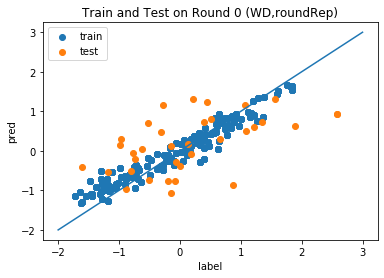

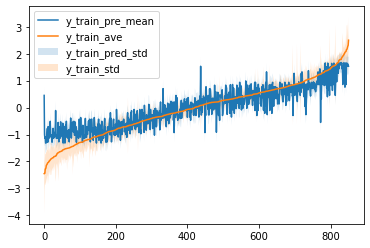

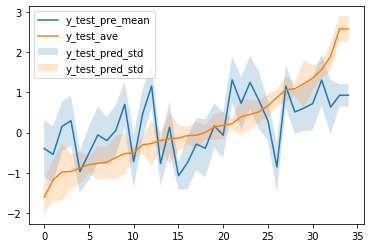

X train shape:  (851, 20)
X test shape:  (35, 20)
create kernel instance
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
<function mean_squared_error at 0x7f2ce6da2488>
Train:  0.07033583441194186
Test:  0.7311968069899306
<function r2_score at 0x7f2ce6da26a8>
Train:  0.9148141164831576
Test:  0.27671385530320625


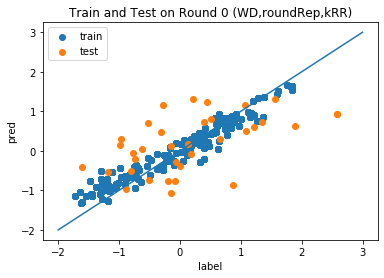

X train shape:  (851, 80)
X test shape:  (35, 80)
gp_reg fit
gp_reg pred
finish reg
<function mean_squared_error at 0x7f2ce6da2488>
Train:  0.040728053897964266
Test:  0.7441692274535412
<function r2_score at 0x7f2ce6da26a8>
Train:  0.9506730063810744
Test:  0.2638817806896202


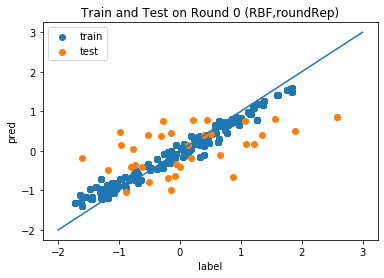

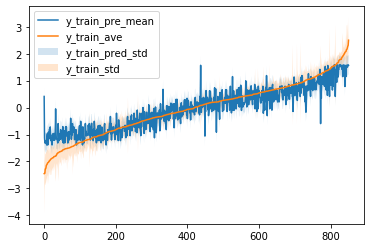

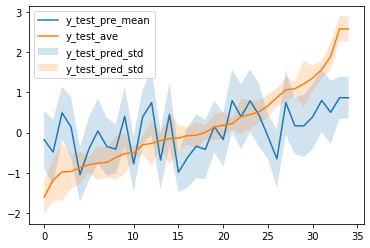

In [4]:
# setting

kernel = 'WD_Kernel_Shift' # 'RBF'
embedding = 'label' # 'onehot'

# run_regression(plate_df[plate_df['Plate'] != 'Third_Plate'], kernel, embedding, title = 'Train and Test on Round 0 (WD,plateRep)')
run_regression(round_df[round_df['Plate'] != 'Third_Plate'], kernel, embedding, title = 'Train and Test on Round 0 (WD,roundRep)')
run_regression(round_df[round_df['Plate'] != 'Third_Plate'], kernel, embedding, predictor=KRR_Predictor, title = 'Train and Test on Round 0 (WD,roundRep,kRR)')

kernel = 'RBF'
embedding = 'onehot'

# run_regression(plate_df[plate_df['Plate'] != 'Third_Plate'], kernel, embedding, title = 'Train and Test on Round 0 (RBF,plateRep)')
run_regression(round_df[round_df['Plate'] != 'Third_Plate'], kernel, embedding, title = 'Train and Test on Round 0 (RBF,roundRep)')

## Train on Round 0 and Test on Round 1

X train shape:  (1061, 20)
X test shape:  (89, 20)
create kernel instance
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
<function mean_squared_error at 0x7f2ce6da2488>
Train:  0.09033796799683004
Test:  0.8850807654700438
<function r2_score at 0x7f2ce6da26a8>
Train:  0.8961023827305918
Test:  -0.02314262848049209


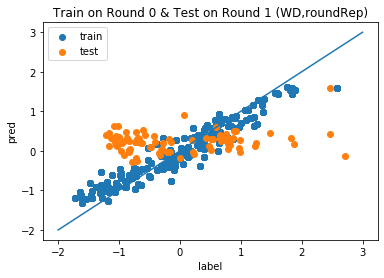

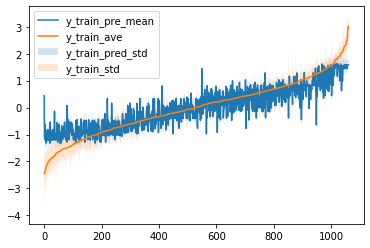

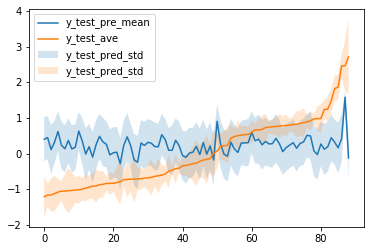

X train shape:  (1061, 20)
X test shape:  (89, 20)
create kernel instance
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
<function mean_squared_error at 0x7f2ce6da2488>
Train:  0.09033715505334053
Test:  0.885081386104355
<function r2_score at 0x7f2ce6da26a8>
Train:  0.8961033176961817
Test:  -0.023143345926227354


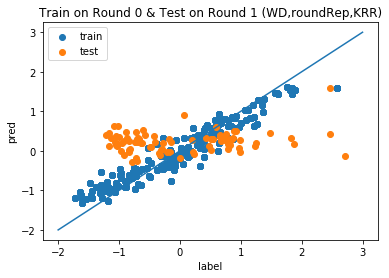

X train shape:  (1061, 80)
X test shape:  (89, 80)
gp_reg fit
gp_reg pred
finish reg
<function mean_squared_error at 0x7f2ce6da2488>
Train:  0.033205728010286914
Test:  0.7565018290885123
<function r2_score at 0x7f2ce6da26a8>
Train:  0.9618101215196038
Test:  0.1254930622598449


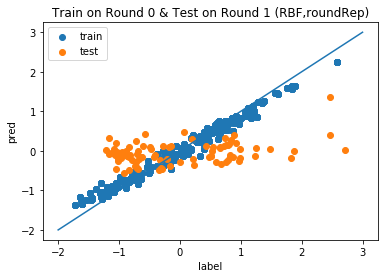

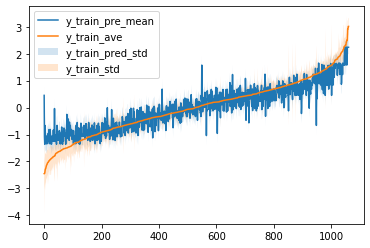

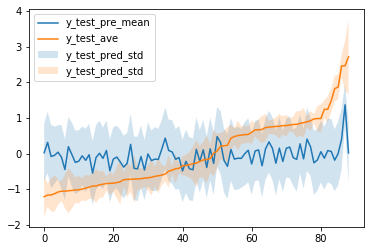

In [5]:
# setting
kernel = 'WD_Kernel_Shift' # 'RBF'
embedding = 'label' # 'onehot'

# run_regression(plate_df, kernel, embedding, train_idx= plate_df['Plate'] != 'Third_Plate', 
#                 test_idx= plate_df['Plate'] == 'Third_Plate', title = ' Train on Round 0 & Test on Round 1 (WD,plateRep)')
run_regression(round_df, kernel, embedding, train_idx= round_df['Plate'] != 'Third_Plate', 
                test_idx= round_df['Plate'] == 'Third_Plate',  title = 'Train on Round 0 & Test on Round 1 (WD,roundRep)')
run_regression(round_df, kernel, embedding, train_idx= round_df['Plate'] != 'Third_Plate', 
                test_idx= round_df['Plate'] == 'Third_Plate', predictor=KRR_Predictor, title = 'Train on Round 0 & Test on Round 1 (WD,roundRep,KRR)')

kernel = 'RBF'
embedding = 'onehot'

# run_regression(plate_df, kernel, embedding, train_idx= plate_df['Plate'] != 'Third_Plate', 
#                 test_idx= plate_df['Plate'] == 'Third_Plate', title = ' Train on Round 0 & Test on Round 1 (RBF,plateRep)')
run_regression(round_df, kernel, embedding, train_idx= round_df['Plate'] != 'Third_Plate', 
                test_idx= round_df['Plate'] == 'Third_Plate',  title = 'Train on Round 0 & Test on Round 1 (RBF,roundRep)')

# train and test on round 0
# gpr_train_samples = GPR_Predictor(df[df['Plate'] != 'Third_Plate'], kernel_name = kernel, embedding = embedding, eva_metric = eva_metric, l = 6, s = 1, alpha = 2, eva_on='seqs')

# train on round 0 (plate 1 and 2) and test on round 1 (plate 3)
# gpr_train_samples = GPR_Predictor(df, train_idx= df['Plate'] != 'Third_Plate', test_idx= df['Plate'] == 'Third_Plate', 
#                    kernel_name = kernel, embedding = embedding, eva_metric = eva_metric,
#                    l = 6, s = 1, alpha = 2, eva_on='seqs')

## Train and Test on All Rounds Data

X train shape:  (1276, 20)
X test shape:  (53, 20)
create kernel instance
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
<function mean_squared_error at 0x7f2ce6da2488>
Train:  0.14233152813499017
Test:  0.5420122425904627
<function r2_score at 0x7f2ce6da26a8>
Train:  0.8397484806308738
Test:  0.28902142061883196


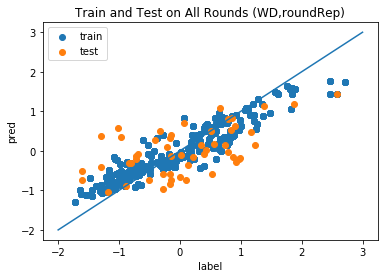

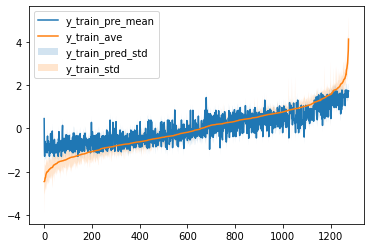

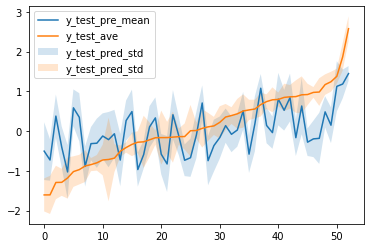

X train shape:  (1276, 20)
X test shape:  (53, 20)
create kernel instance
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
<function mean_squared_error at 0x7f2ce6da2488>
Train:  0.142330442632682
Test:  0.542012841400003
<function r2_score at 0x7f2ce6da26a8>
Train:  0.8397497028013685
Test:  0.2890206351370238


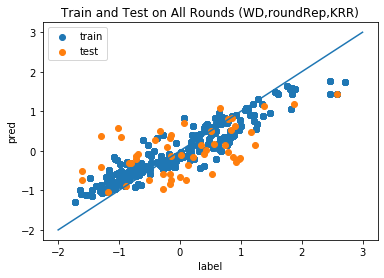

X train shape:  (1276, 80)
X test shape:  (53, 80)
gp_reg fit
gp_reg pred
finish reg
<function mean_squared_error at 0x7f2ce6da2488>
Train:  0.017516774707421728
Test:  0.7690443236773623
<function r2_score at 0x7f2ce6da26a8>
Train:  0.9802778077486197
Test:  -0.00878540697911423


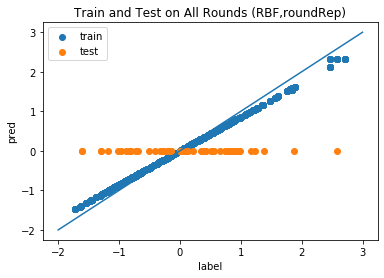

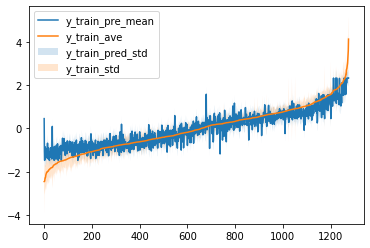

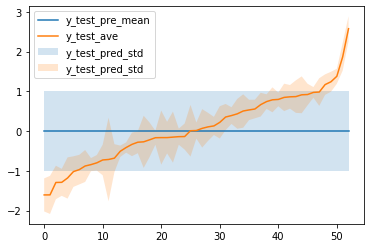

In [6]:
# setting
kernel = 'WD_Kernel_Shift' # 'RBF'
embedding = 'label' # 'onehot'

# run_regression(plate_df, kernel, embedding, title = 'Train and Test on All Rounds (WD,plateRep)')
run_regression(round_df, kernel, embedding, title = 'Train and Test on All Rounds (WD,roundRep)')
run_regression(round_df, kernel, embedding, predictor=KRR_Predictor, title = 'Train and Test on All Rounds (WD,roundRep,KRR)')

kernel = 'RBF'
embedding = 'onehot'

# run_regression(plate_df, kernel, embedding, title = 'Train and Test on All Rounds (RBF,plateRep)')
run_regression(round_df, kernel, embedding, title = 'Train and Test on All Rounds (RBF,roundRep)')

In [7]:
# kernel = 'RBF'
# embedding = 'onehot'
# eva_metric = [mean_squared_error, r2_score]

# # gpr_train_samples = GPR_Predictor(df, kernel_name = kernel, embedding = embedding, eva_metric = eva_metric,
# #                    alpha = 2, eva_on='seqs')

# # train and test on round 0
# gpr_train_samples = GPR_Predictor(df[df['Plate'] != 'Third_Plate'], kernel_name = kernel, embedding = embedding, eva_metric = eva_metric, alpha = 2, eva_on='seqs')

# # train on round 0 (plate 1 and 2) and test on round 1 (plate 3)
# # gpr_train_samples = GPR_Predictor(df, train_idx= df['Plate'] != 'Third_Plate', test_idx= df['Plate'] == 'Third_Plate', 
# #                    kernel_name = kernel, embedding = embedding, eva_metric = eva_metric,
# #                    l = 6, s = 1, alpha = 2, eva_on='seqs')
# gpr_train_samples.regression()
# gpr_train_samples.scatter_plot()

## Conclusion

For train and test on round 0 or all rounds, WD is better than baseline and the prediction looks reasonable (test error is still big but at least show correct pattern). However, the generalisation between round 0 and round 1 is bad. For train on round 0 and test on round 1, WD is even worse than baseline. Both WD and baseline predictions look in the wrong range and pattern.
Several possible reasons:
- round 1 are areas we do not have enough information from round 0 (need to check by tsne?)
- normalisation over different rounds still problematic.
- in round 0 we have lots of sequences where the noncore part is not the same as our design space. The predictor trained on round 0 data could be biased.
- note the prediction is different from we have in the design file. Except for different normalisation methods for labels, the normalisation over kernels is different. For the design one, the kernel is normalised over all known sequences and design space; for this notebook, the kernel is normalised over input train and test data.


## Discussion

- the normalisation in terms of plate or round makes difference for our first experiment (train and test on Round 0)
- for all experiments, after the new normalisation, the high labels are fail to predict. Possible reasons:
    - non-core disruption?
    - feature space not complated enough.

## Try: exclude non-core sequences [Does Not Help]



X train shape:  (1079, 20)
X test shape:  (45, 20)
create kernel instance
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
<function mean_squared_error at 0x7f2ce6da2488>
Train:  0.19055576316468906
Test:  0.9187662372431646
<function r2_score at 0x7f2ce6da26a8>
Train:  0.7576776581698075
Test:  0.18425849097366742


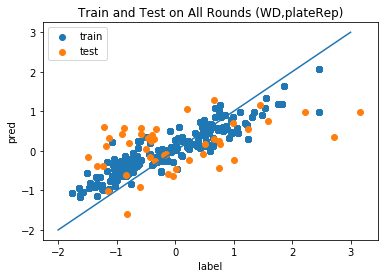

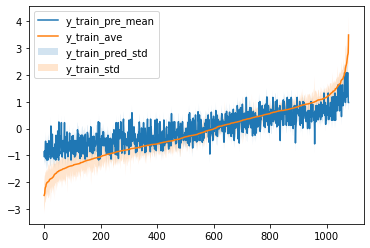

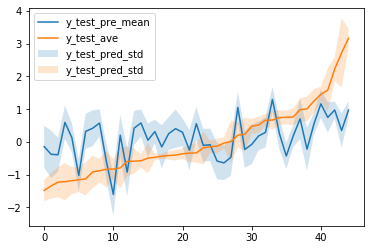

X train shape:  (1079, 20)
X test shape:  (45, 20)
create kernel instance
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
<function mean_squared_error at 0x7f2ce6da2488>
Train:  0.18419493318587896
Test:  0.8544356271047623
<function r2_score at 0x7f2ce6da26a8>
Train:  0.7373292919558676
Test:  0.19075986824700353


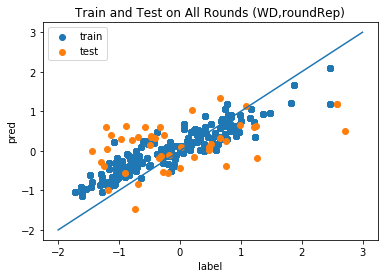

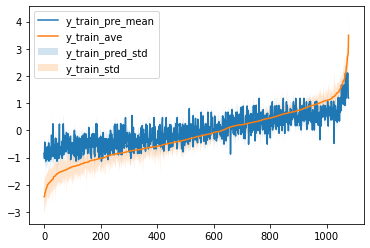

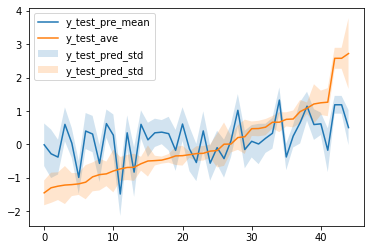

X train shape:  (1079, 80)
X test shape:  (45, 80)
gp_reg fit
gp_reg pred
finish reg
<function mean_squared_error at 0x7f2ce6da2488>
Train:  0.016649558245491802
Test:  1.0119876845288236
<function r2_score at 0x7f2ce6da26a8>
Train:  0.9788274052829414
Test:  0.1014903166548109


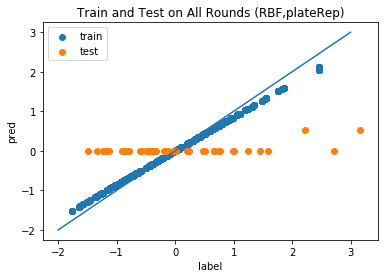

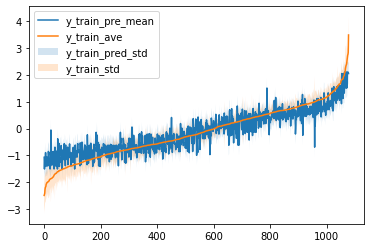

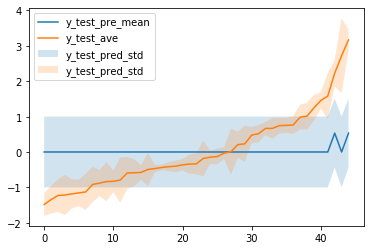

X train shape:  (1079, 80)
X test shape:  (45, 80)
gp_reg fit
gp_reg pred
finish reg
<function mean_squared_error at 0x7f2ce6da2488>
Train:  0.01519852351884202
Test:  0.9466850220085768
<function r2_score at 0x7f2ce6da26a8>
Train:  0.9783261848473817
Test:  0.10339001835081707


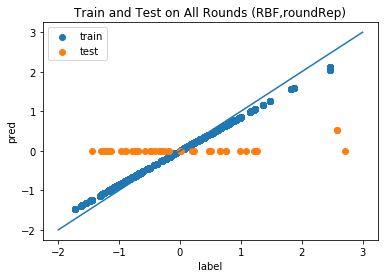

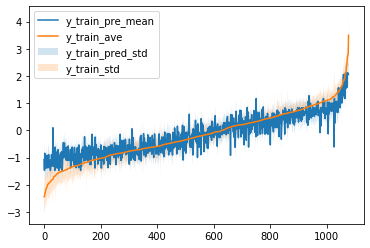

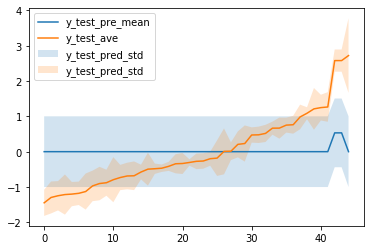

In [8]:
# setting
kernel = 'WD_Kernel_Shift' # 'RBF'
embedding = 'label' # 'onehot'

noncore_plate_df = plate_df[plate_df.loc[:,'Group'] != 'bps_noncore']
noncore_plate_df.reset_index(inplace=True)
noncore_round_df = round_df[round_df.loc[:,'Group'] != 'bps_noncore']
noncore_round_df.reset_index(inplace=True)

run_regression(noncore_plate_df, kernel, embedding, title = 'Train and Test on All Rounds (WD,plateRep)')
run_regression(noncore_round_df, kernel, embedding, title = 'Train and Test on All Rounds (WD,roundRep)')

kernel = 'RBF'
embedding = 'onehot'

run_regression(noncore_plate_df, kernel, embedding, title = 'Train and Test on All Rounds (RBF,plateRep)')
run_regression(noncore_round_df, kernel, embedding, title = 'Train and Test on All Rounds (RBF,roundRep)')